# Observation of Multiphoton ionization effect

The effect is presented with the model :

$$\frac{\partial E}{\partial z} = - \frac{\beta^K}{2}\left|E\right|^{2K-2}E  $$

In this case, we can obtain the analytical solution by integrating the equation. With the analytical solution, like our study of other effect, we want to verify that the numerical solution obtained is good enough to use in split method when we solve the equation with all the effect.

The analytical solution :

$ E = E_1 + E_2 $ such that $ E_1 = \operatorname{Re}(E)$ and $E_2 = \operatorname{Im}(E)$ 

\begin{equation}
    E_1 = \left[(K-1)\beta^{(K)}\left(1+\frac{E_{20}^2}{E_{10}^2}\right)^{K-1}z + \frac{1}{E_{10}^{2K-2}} \right]^{\frac{1}{2-2K}}
\end{equation}

\begin{equation}
    E_2 = \frac{E_{20}}{E_{10}}E_1
\end{equation}

Since $E_0$ is gaussian, the imaginary part is 0. So the equation becomes:
\begin{equation}
    E = \left[(K-1)\beta^{(K)}z + \frac{1}{E_{0}(x,y)^{2K-2}} \right]^{\frac{1}{2-2K}}
\end{equation}

Or presented in intensity : 
\begin{equation}
    \left|E(x,y,z)\right|^2 = I(x,y,z) = \frac{I_0(x,y)}{\left(1 + \left(K - 1\right)\beta^{(K)}I_0(x,y)^{K-1}z\right)^{1/(K-1)}}
\end{equation}



## Comparaison between analytical and numrical solution

Position: z =  0.0
Mean:  1.0
Standard deviation:  0.0
------------
Position: z =  0.6
Mean:  1.00000000023
Standard deviation:  1.43797961772e-09
------------
Position: z =  0.83
Mean:  1.00000000032
Standard deviation:  1.98921464929e-09
------------
Position: z =  1.0
Mean:  1.00000000038
Standard deviation:  2.39663264378e-09
------------


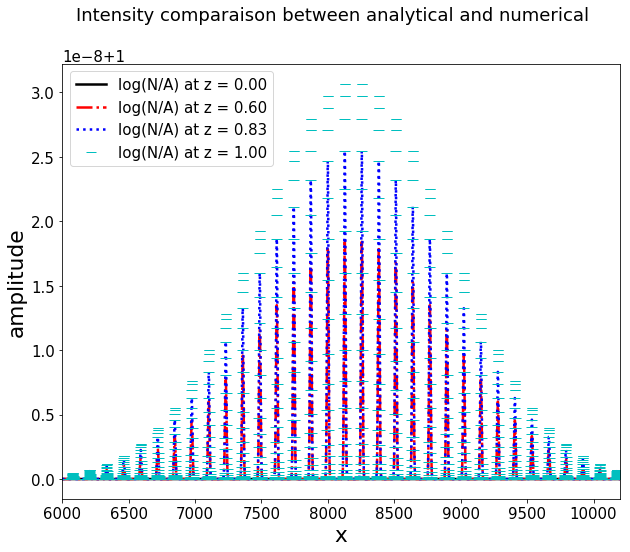

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#Zoom the figure in matplotlib
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.labelsize'] = 'x-large'
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['lines.markersize'] = 10.0

#Import parameters from python
parameter = np.loadtxt("../results/Absorption/parameters_absorption.txt")
Pcr = parameter[0]
k = parameter[1]
K = parameter[2]
L = parameter[3]
N = int(parameter[4])
Lz = parameter[5]
Nz = int(parameter[6])
nb_save = int(parameter[7])
w0 = parameter[8]
p = parameter[9]
beta = 6.5*1e-104
#normalise constant
beta = beta*(10**8)**(2*K-2)

#spacial discretization along x and y, need to be the same as production codes
r, d = np.linspace(-L, L, 2*N, retstep=True) 
x, y = np.meshgrid(r,r)

#Numerical solution
inten_num = np.loadtxt("../results/Absorption/intensity_absorption.txt")
nb_pics = int((inten_num.shape[0]*inten_num.shape[1])/(2*N)**2)
inten_num = inten_num.reshape((nb_pics, 2*N, 2*N))

#Analytical solution 
I0 = inten_num[0]      #I0: I at z = 0
inten_analy = lambda z : I0/(1 + (K-1)*beta*I0**(K-1)*z)**(1/(K-1))

z_interested = np.array([0, 0.6, 0.83, Lz-1])
pos_interested = z_interested*nb_save/Lz
pos_interested = pos_interested.astype(int)
colors = ['k-', 'r-.', 'b:', 'c_']

for i in range(4):
    A = (inten_num[pos_interested[i]]/inten_analy(z_interested[i])).flatten()
    print("Position: z = ",  z_interested[i])
    print("Mean: ", np.mean(A))
    print("Standard deviation: ", np.std(A))
    print("------------")
    x = np.linspace(0, 4*N**2, 4*N**2)
    plt.plot(x, A, colors[i], label = 'log(N/A) at z = %.2f' %z_interested[i])

plt.xlabel('x')
plt.ylabel('amplitude')
plt.xlim(6000, 10200)
plt.suptitle('Intensity comparaison between analytical and numerical')
#plt.ylim(-1.51e-9, 0.51e-9)
plt.legend()
# save figure as pdf
plt.savefig("../figures/inten_compare_absorp.png")
plt.show()

